# 1、关于对话模型中消息（message）的使用

标准的对话模型的调用过程：

invoke()的输入可以是多种类型，典型的类型有：① 字符串类型 ② 消息列表

invoke()的输出类型：BaseMessage的子类：AIMessage

In [2]:
from langchain_openai import ChatOpenAI
import os
import dotenv

# 前提：加载配置文件
dotenv.load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY1")
os.environ["OPENAI_BASE_URL"] = os.getenv("OPENAI_BASE_URL")

# 1、获取对话模型
chat_model = ChatOpenAI(
    # api_key=,
    # base_url=,
    model_name="gpt-4o-mini",
)

# 2、调用对话模型
response = chat_model.invoke("帮我解释一下什么是langchain?")

# 3、处理响应数据
# print(response)
print(response.content)
print(type(response))  #<class 'langchain_core.messages.ai.AIMessage'>

LangChain 是一个用于构建基于自然语言处理（NLP）应用的框架，特别是与大型语言模型（如 OpenAI 的 GPT 系列模型）交互的应用。其设计目的是通过简化开发过程，使得开发者能够更容易地创建复杂的对话系统、数据分析工具和其他需要理解自然语言的程序。

LangChain 的几个主要特点包括：

1. **组件化结构**：LangChain 提供了一系列可复用的组件，开发者可以根据需求灵活组合这些组件来构建自己的应用。例如，解析用户输入、生成文本、与外部数据源交互等功能都有相应的模块。

2. **数据连接**：LangChain 支持与多种数据源集成，包括数据库、API 和文件系统，使得应用能够处理和分析更多类型的数据。

3. **支持多种模型**：虽然 LangChain 主要与大型语言模型合作，但它也可以与其他类型的机器学习模型结合使用，增强应用的功能。

4. **上下文管理**：在对话系统中，管理上下文信息是非常重要的，LangChain 提供了工具来帮助开发者保持对话状态，从而提升用户体验。

总的来说，LangChain 是一个强大的工具，旨在降低构建基于语言的应用的复杂性，并为开发者提供丰富的功能和灵活性。
<class 'langchain_core.messages.ai.AIMessage'>


关于消息：

有典型的三类消息：SystemMessage \ HumanMessage \ AIMessage

举例1：


In [3]:
from langchain_core.messages import SystemMessage, HumanMessage

system_message = SystemMessage(content="你是一个英语教学方向的专家")
human_message = HumanMessage(content="帮我制定一个英语六级学习的计划")

messages = [system_message, human_message]

print(messages)

[SystemMessage(content='你是一个英语教学方向的专家', additional_kwargs={}, response_metadata={}), HumanMessage(content='帮我制定一个英语六级学习的计划', additional_kwargs={}, response_metadata={})]


使用大模型，调用消息列表

In [4]:
response = chat_model.invoke(messages)
print(type(response))
print(response.content)

<class 'langchain_core.messages.ai.AIMessage'>
以下是一个为期三个月的英语六级学习计划，适合有一定基础的学生。该计划涵盖听力、阅读、写作和翻译等各个方面，建议每天坚持学习，灵活调整进度。

### 第一个月：基础强化

#### Week 1-2: 听力与词汇
- **听力**: 
  - 每天听30分钟英语六级真题听力，集中在听辨和笔记。
  - 选择适合的听力材料（如VOA、BBC）进行跟读练习。
- **词汇**: 
  - 每天学习20个六级核心词汇，利用记忆法（如联想记忆）加深印象。
  - 每周复习一遍所有词汇。

#### Week 3-4: 阅读与语法
- **阅读**:
  - 每天阅读1篇六级真题阅读理解，分析文章结构和主要观点。
  - 进行细节题、推理题的练习，培养答题技巧。
- **语法**:
  - 每周学习2-3个语法点，结合练习册进行练习。
  - 进行重点句型的写作练习，注意语法的使用。

### 第二个月：技能提升

#### Week 5-6: 写作与翻译
- **写作**:
  - 学习六级作文的常用结构（如总分总），每周写2篇作文。
  - 阅读优秀范文，分析其结构和用词。
- **翻译**:
  - 每周进行英语翻译练习，包括段落和句子。
  - 学习常用句型和翻译技巧（如直译与意译）。

#### Week 7-8: 模拟测试
- **综合练习**:
  - 每周进行一次全真模拟测试，时间和环境尽量接近正式考试。
  - 分析测试结果，找出薄弱环节，并针对性练习。

### 第三个月：实战演练

#### Week 9-10: 深度复习
- **查缺补漏**:
  - 针对前两个月测试中发现的薄弱环节进行集中复习。
  - 加强记忆和应用核心词汇和语法点，根据学习需要调整内容。

#### Week 11-12: 考前冲刺
- **模拟考试**:
  - 每周进行1-2次全真模拟考试，时间控制在正式考试的时间内。
  - 进行考后复盘，分析错题，注意总结经验教训。
  
- **心态调整**:
  - 保持良好的作息，合理安排学习和休息时间，避免临考前的焦虑。
  - 进行一些放松活动，提高心理素质。

### 其他建议
1. **学习资料**: 可以选择使用六级专用教材、网

举例2：

In [6]:
from langchain_core.messages import SystemMessage, HumanMessage

system_message = SystemMessage(
    content="你是一个英语教学方向的专家",
    additional_kwargs={"tool":"invoke_func1"}
)
human_message = HumanMessage(content="帮我制定一个英语六级学习的计划")

messages = [system_message, human_message]

print(messages)

[SystemMessage(content='你是一个英语教学方向的专家', additional_kwargs={'tool': 'invoke_func1'}, response_metadata={}), HumanMessage(content='帮我制定一个英语六级学习的计划', additional_kwargs={}, response_metadata={})]


举例3:ChatMessage平时我们使用的不多，了解一下即可

In [7]:
from langchain_core.messages import (
    AIMessage,
    HumanMessage,
    SystemMessage,
    ChatMessage
)

# 创建不同类型的消息
system_message = SystemMessage(content="你是一个专业的数据科学家")
human_message = HumanMessage(content="解释一下随机森林算法")
ai_message = AIMessage(content="随机森林是一种集成学习方法...")
custom_message = ChatMessage(role="analyst", content="补充一点关于超参数调优的信息")

print(system_message.content)
print(human_message.content)
print(ai_message.content)
print(custom_message.content)

你是一个专业的数据科学家
解释一下随机森林算法
随机森林是一种集成学习方法...
补充一点关于超参数调优的信息


# 2、关于多轮对话与上下文记忆

前提：

In [8]:
import os
import dotenv
from langchain_openai import ChatOpenAI

dotenv.load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY1")
os.environ['OPENAI_BASE_URL'] = os.getenv("OPENAI_BASE_URL")

chat_model = ChatOpenAI(
	model="gpt-4o-mini"
)

测试1：大模型本身是没有上下文记忆能力的



In [9]:
from langchain_core.messages import SystemMessage, HumanMessage

sys_message = SystemMessage(
    content="我是一个人工智能的助手，我的名字叫小智",
)
human_message = HumanMessage(content="猫王是一只猫吗？")

messages = [sys_message, human_message]

#调用大模型，传入messages
response = chat_model.invoke(messages)
# print(response.content)


response1 = chat_model.invoke("你叫什么名字？")
print(response1.content)

我是一个人工智能助手，没有具体的名字，但你可以叫我“助手”或“AI”。有什么我可以帮助你的吗？


测试2：

In [10]:
from langchain_core.messages import SystemMessage, HumanMessage

sys_message = SystemMessage(
    content="我是一个人工智能的助手，我的名字叫小智",
)
human_message = HumanMessage(content="猫王是一只猫吗？")
human_message1 = HumanMessage(content="你叫什么名字？")

messages = [sys_message, human_message,human_message1]

#调用大模型，传入messages
response = chat_model.invoke(messages)
print(response.content)


我叫小智。请问有什么可以帮助你的？


测试3：

In [11]:
from langchain_core.messages import SystemMessage, HumanMessage

sys_message = SystemMessage(
    content="我是一个人工智能的助手，我的名字叫小智",
)
human_message = HumanMessage(content="猫王是一只猫吗？")

sys_message1 = SystemMessage(
    content="我可以做很多事情，有需要就找我吧",
)

human_message1 = HumanMessage(content="你叫什么名字？")

messages = [sys_message, human_message,sys_message1,human_message1]

#调用大模型，传入messages
response = chat_model.invoke(messages)
print(response.content)


我叫小智，您可以叫我助手。有需要帮助的地方吗？


测试4：

In [3]:
from langchain_core.messages import SystemMessage, HumanMessage

# 第1组
sys_message = SystemMessage(
    content="我是一个人工智能的助手，我的名字叫小智",
)
human_message = HumanMessage(content="猫王是一只猫吗？")

messages = [sys_message, human_message]

# 第2组
sys_message1 = SystemMessage(
    content="我可以做很多事情，有需要就找我吧",
)

human_message1 = HumanMessage(content="你叫什么名字？")

messages1 = [sys_message1,human_message1]

#调用大模型，传入messages
response = chat_model.invoke(messages)
print(response.content)

response = chat_model.invoke(messages1)
print(response.content)

“猫王”通常指的是著名的美国歌手埃尔维斯·普雷斯利（Elvis Presley），由于他的名字中的“猫”和王者的称号，常被戏称为“猫王”。所以，从字面上讲，猫王并不是一只猫，而是一个人。不过，埃尔维斯本人在文化中常常被与猫的形象结合，因此有时人们会用“猫王”来指代他。
我是一个人工智能助手，没有具体的名字。你可以叫我“助手”或随便取一个名字。有什么我可以帮你的吗？


测试5：

In [13]:
from langchain_core.messages import SystemMessage, HumanMessage, AIMessage

messages = [
    SystemMessage(content="我是一个人工智能助手，我的名字叫小智"),
    HumanMessage(content="人工智能英文怎么说？"),
    AIMessage(content="AI"),
    HumanMessage(content="你叫什么名字"),
]

messages1 = [
    SystemMessage(content="我是一个人工智能助手，我的名字叫小智"),
    HumanMessage(content="很高兴认识你"),
    AIMessage(content="我也很高兴认识你"),
    HumanMessage(content="你叫什么名字"),
]

messages2 = [
    SystemMessage(content="我是一个人工智能助手，我的名字叫小智"),
    HumanMessage(content="人工智能英文怎么说？"),
    AIMessage(content="AI"),
    HumanMessage(content="你叫什么名字"),
]

chat_model.invoke(messages2)

AIMessage(content='我叫小智。有什么我可以帮助你的吗？', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 40, 'total_tokens': 53, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'id': 'chatcmpl-C7Yc4CexF0a9rwfGrTHmp1OVT9xI3', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--d70d45e2-1c6f-4bb3-bedd-d3efba980561-0', usage_metadata={'input_tokens': 40, 'output_tokens': 13, 'total_tokens': 53, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

# 3、关于模型调用的方法的说明

invoke() / stream()

batch():批量的调用

ainvoke() / astream() / abatch():异步方法的调用

举例1：体会invoke()阻塞式的调用

In [14]:
import os
import dotenv
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI

dotenv.load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY1")
os.environ['OPENAI_BASE_URL'] = os.getenv("OPENAI_BASE_URL")

#初始化大模型
chat_model = ChatOpenAI(model="gpt-4o-mini")

# 创建消息
messages = [HumanMessage(content="你好，请介绍一下自己")]

# 非流式调用LLM获取响应
response = chat_model.invoke(messages)

# 打印响应内容
print(response)

content='你好！我是一个人工智能助手，旨在提供信息和解答问题。我可以帮助你获取知识、解决疑问、提供建议等。如果你有任何问题或者需要讨论的主题，随时告诉我！' additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 12, 'total_tokens': 59, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_efad92c60b', 'id': 'chatcmpl-C7ZDy9mkaVOH2rMyT0JLgum8ZPlQl', 'service_tier': None, 'finish_reason': 'stop', 'logprobs': None} id='run--d31ca017-0571-4506-8fc1-3a3eb762b4ce-0' usage_metadata={'input_tokens': 12, 'output_tokens': 47, 'total_tokens': 59, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}


举例2：流式的演示

In [4]:
import os
import dotenv
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI

dotenv.load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY")
os.environ['OPENAI_BASE_URL'] = os.getenv("OPENAI_BASE_URL")

# 初始化大模型
chat_model = ChatOpenAI(model="gpt-4o-mini",
                        streaming=True  # 启用流式输出
                        )

# 创建消息
messages = [HumanMessage(content="你好，请介绍一下自己")]

# 流式调用LLM获取响应
print("开始流式输出：")
for chunk in chat_model.stream(messages):
    # 逐个打印内容块
    print(chunk.content, end="", flush=True) # 刷新缓冲区 (无换行符，缓冲区未刷新，内容可能不会立即显示)

print("\n流式输出结束")

开始流式输出：
你好！我是一款人工智能助手，旨在为你提供信息和帮助。无论你有关于科学、技术、历史、文化、健康还是其他任何主题的问题，我都会尽力为你提供准确和有用的答案。如果你有任何具体的问题或想了解的内容，请随时告诉我！
流式输出结束


举例3：使用batch，测试批量调用

In [5]:
import os
import dotenv
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI

dotenv.load_dotenv()

os.environ['OPENAI_API_KEY'] = os.getenv("OPENAI_API_KEY1")
os.environ['OPENAI_BASE_URL'] = os.getenv("OPENAI_BASE_URL")

# 初始化大模型
chat_model = ChatOpenAI(model="gpt-4o-mini")

messages1 = [SystemMessage(content="你是一位乐于助人的智能小助手"),
             HumanMessage(content="请帮我介绍一下什么是机器学习"), ]

messages2 = [SystemMessage(content="你是一位乐于助人的智能小助手"),
             HumanMessage(content="请帮我介绍一下什么是AIGC"), ]

messages3 = [SystemMessage(content="你是一位乐于助人的智能小助手"),
             HumanMessage(content="请帮我介绍一下什么是大模型技术"), ]

messages = [messages1, messages2, messages3]

# 调用batch
response = chat_model.batch(messages)

print(response)


[AIMessage(content='机器学习是一种人工智能（AI）的分支，它使计算机系统能够通过经验自动改进其性能，而无需明确编程。机器学习的核心思想是，系统可以利用数据进行自我学习，识别模式并进行预测。\n\n机器学习通常分为三种主要类型：\n\n1. **监督学习**：在这种类型中，模型通过使用标注好的数据进行训练，也就是说，每个训练样本都包含输入和期望的输出。模型从这些数据中学习，以便能够对新数据进行预测。常见的应用包括图像分类、语音识别和预测性分析。\n\n2. **无监督学习**：无监督学习处理的输入数据没有标注，模型的目标是从数据中识别结构或模式。常见的应用包括聚类（例如，将顾客分组）和降维（例如，数据可视化）。\n\n3. **半监督学习**：结合了监督学习和无监督学习的特点，使用少量标注数据和大量未标注数据进行训练。这在获取标注数据成本较高的情况下尤为有用。\n\n机器学习的应用非常广泛，包括自然语言处理、推荐系统、图像识别、金融分析、医疗诊断等。随着数据量的增加和计算能力的提高，机器学习已经成为许多领域的重要技术基础。', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 290, 'prompt_tokens': 30, 'total_tokens': 320, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_560af6e559', 'id': 'chatcmpl-CW0hP8KSTSN7iC7a517uWGB7eAU9G', 'service_tier': 'default', 'finish_reason': 'st

举例4：关于同步和异步方法的调用

体会1：

In [18]:
import time

def call_model():
    # 模拟同步API调用
    print("开始调用模型...")
    time.sleep(5)  # 模拟调用等待,单位：秒
    print("模型调用完成。")

def perform_other_tasks():
    # 模拟执行其他任务
    for i in range(5):
        print(f"执行其他任务 {i + 1}")
        time.sleep(1)  # 单位：秒

def main():
    start_time = time.time()
    call_model()
    perform_other_tasks()
    end_time = time.time()
    total_time = end_time - start_time
    return f"总共耗时：{total_time}秒"

# 运行同步任务并打印完成时间
main_time = main()
print(main_time)

开始调用模型...
模型调用完成。
执行其他任务 1
执行其他任务 2
执行其他任务 3
执行其他任务 4
执行其他任务 5
总共耗时：10.033676385879517秒


体会2：

In [19]:
import asyncio
import time

async def async_call(llm):
    await asyncio.sleep(5)  # 模拟异步操作
    print("异步调用完成")

async def perform_other_tasks():
    await asyncio.sleep(5)  # 模拟异步操作
    print("其他任务完成")

async def run_async_tasks():
    start_time = time.time()
    await asyncio.gather(
        async_call(None),  # 示例调用，使用None模拟LLM对象
        perform_other_tasks()
    )
    end_time = time.time()
    return f"总共耗时：{end_time - start_time}秒"

# # 正确运行异步任务的方式
# if __name__ == "__main__":
#     # 使用 asyncio.run() 来启动异步程序
#     result = asyncio.run(run_async_tasks())
#     print(result)


# 在 Jupyter 单元格中直接调用
result = await run_async_tasks()
print(result)

异步调用完成
其他任务完成
总共耗时：5.0116283893585205秒


![image.png](QQ20251029-214618.jpg)
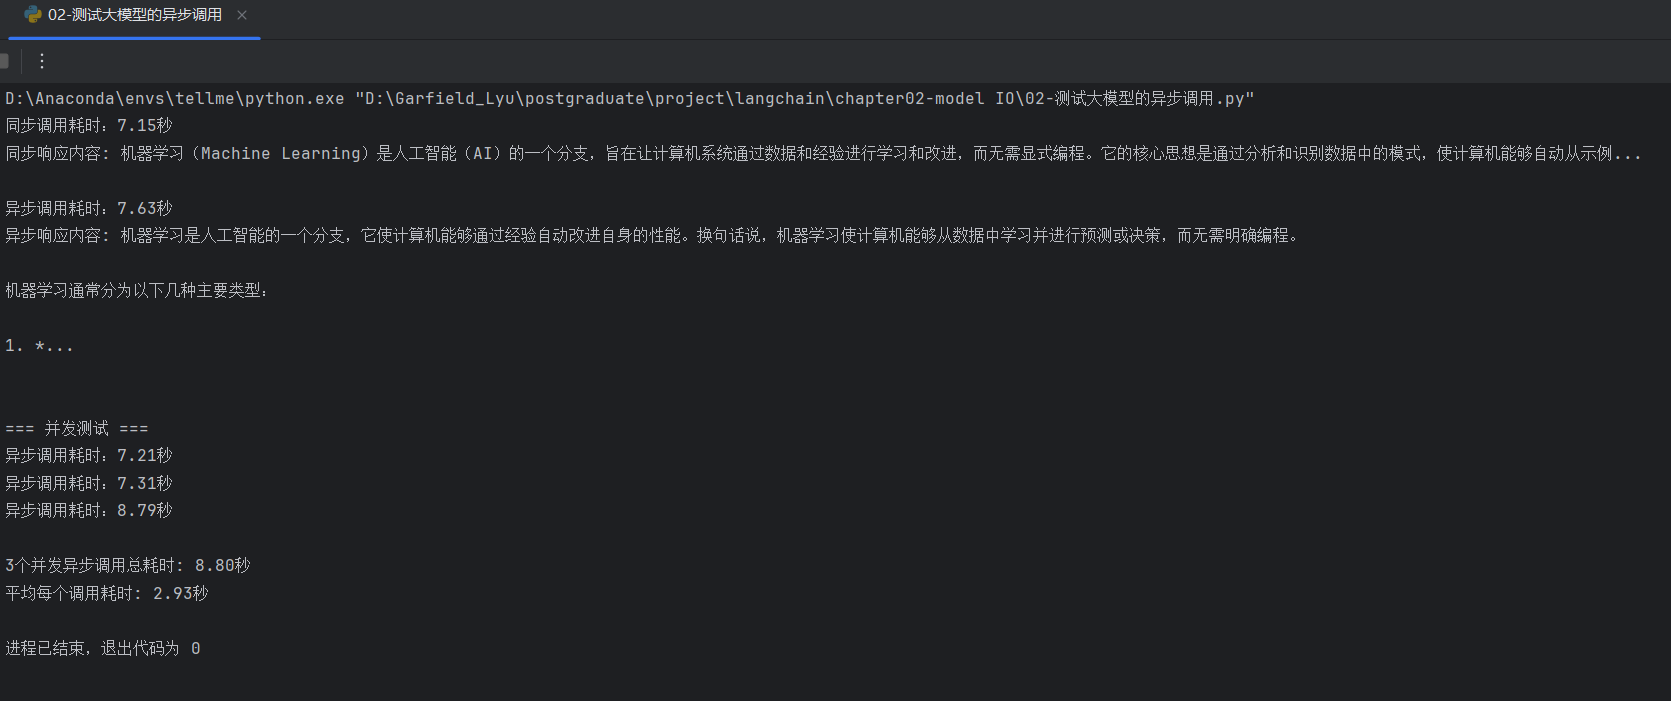